In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
ahmedabad_meteo = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Metrological Data/Ahmedabad.csv', delimiter=',')
ahmedabad_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,15.4,92,0.0,1007.9,7.9,19.0,51,61
1,2024-01-01T01:00,15.9,94,0.0,1008.6,8.4,20.1,59,66
2,2024-01-01T02:00,15.8,95,0.0,1009.1,8.5,20.0,54,62
3,2024-01-01T03:00,17.5,89,0.0,1009.7,10.7,19.9,48,58
4,2024-01-01T04:00,20.0,78,0.0,1010.4,9.1,13.3,56,57
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.9,64,0.0,1010.6,7.9,16.3,12,10
8780,2024-12-31T20:00,18.8,67,0.0,1010.3,7.9,16.5,13,18
8781,2024-12-31T21:00,18.2,69,0.0,1009.8,7.5,15.9,21,28
8782,2024-12-31T22:00,17.8,72,0.0,1009.4,7.3,15.1,28,40


In [3]:
ahmedabad_pollutants = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Pollutants/Ahmedabad.csv', delimiter= ',')
ahmedabad_pollutants['Timestamp'] = ahmedabad_meteo['time']
ahmedabad_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
ahmedabad_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,76.69,149.37,5.92,13.36,18.25,17.60,2.93,0.67,12.49,...,1.04,20.56,68.20,0.54,155.03,0.0,0.0,4.00,1001.0,0.97
1,2024-01-01T01:00,73.70,141.64,6.36,13.02,18.56,17.22,2.93,0.62,10.70,...,1.00,20.28,70.27,0.38,187.69,0.0,0.0,4.00,1001.0,0.96
2,2024-01-01T02:00,75.09,142.72,6.21,13.55,18.21,17.26,2.87,0.62,9.92,...,1.03,19.94,72.19,0.40,176.28,0.0,0.0,4.00,1001.0,0.94
3,2024-01-01T03:00,69.18,134.46,6.31,12.52,17.82,17.03,2.76,0.57,9.99,...,0.94,19.74,72.07,0.27,164.33,0.0,0.0,4.00,1001.0,0.93
4,2024-01-01T04:00,67.55,130.85,6.10,11.48,17.51,17.07,2.95,0.53,12.56,...,1.08,19.79,67.94,0.28,158.78,0.0,0.0,4.00,1001.0,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,53.32,111.81,12.22,54.43,43.43,36.13,10.49,1.89,10.53,...,3.04,21.22,59.94,0.08,151.41,0.0,0.0,147.70,1001.0,1.02
8780,2024-12-31T20:00,99.87,202.16,22.36,62.79,58.02,39.05,11.55,2.34,9.67,...,4.65,20.26,77.94,0.09,232.01,0.0,0.0,148.14,1001.0,1.00
8781,2024-12-31T21:00,114.30,224.28,22.78,55.37,53.62,35.16,8.86,2.33,9.39,...,6.26,19.79,69.11,0.08,179.10,0.0,0.0,146.41,1001.0,0.99
8782,2024-12-31T22:00,95.02,182.81,21.94,44.44,46.90,36.48,8.50,1.79,8.81,...,8.27,19.50,73.52,0.10,212.33,0.0,0.0,147.20,1001.0,0.97


In [4]:
ahmedabad = pd.merge(ahmedabad_meteo.iloc[:, :], ahmedabad_pollutants.iloc[:, 0:3], on='time')
ahmedabad

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,15.4,92,0.0,1007.9,7.9,19.0,51,61,76.69,149.37
1,2024-01-01T01:00,15.9,94,0.0,1008.6,8.4,20.1,59,66,73.70,141.64
2,2024-01-01T02:00,15.8,95,0.0,1009.1,8.5,20.0,54,62,75.09,142.72
3,2024-01-01T03:00,17.5,89,0.0,1009.7,10.7,19.9,48,58,69.18,134.46
4,2024-01-01T04:00,20.0,78,0.0,1010.4,9.1,13.3,56,57,67.55,130.85
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.9,64,0.0,1010.6,7.9,16.3,12,10,53.32,111.81
8780,2024-12-31T20:00,18.8,67,0.0,1010.3,7.9,16.5,13,18,99.87,202.16
8781,2024-12-31T21:00,18.2,69,0.0,1009.8,7.5,15.9,21,28,114.30,224.28
8782,2024-12-31T22:00,17.8,72,0.0,1009.4,7.3,15.1,28,40,95.02,182.81


In [5]:
ahmedabad['city'] = 'Ahmedabad'
ahmedabad

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,15.4,92,0.0,1007.9,7.9,19.0,51,61,76.69,149.37,Ahmedabad
1,2024-01-01T01:00,15.9,94,0.0,1008.6,8.4,20.1,59,66,73.70,141.64,Ahmedabad
2,2024-01-01T02:00,15.8,95,0.0,1009.1,8.5,20.0,54,62,75.09,142.72,Ahmedabad
3,2024-01-01T03:00,17.5,89,0.0,1009.7,10.7,19.9,48,58,69.18,134.46,Ahmedabad
4,2024-01-01T04:00,20.0,78,0.0,1010.4,9.1,13.3,56,57,67.55,130.85,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.9,64,0.0,1010.6,7.9,16.3,12,10,53.32,111.81,Ahmedabad
8780,2024-12-31T20:00,18.8,67,0.0,1010.3,7.9,16.5,13,18,99.87,202.16,Ahmedabad
8781,2024-12-31T21:00,18.2,69,0.0,1009.8,7.5,15.9,21,28,114.30,224.28,Ahmedabad
8782,2024-12-31T22:00,17.8,72,0.0,1009.4,7.3,15.1,28,40,95.02,182.81,Ahmedabad


In [6]:
ahmedabad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    ahmedabad[delay1_col] = ahmedabad[col].shift(1)
    delay2_col = col + "_delay2"
    ahmedabad[delay2_col] = ahmedabad[col].shift(2)
    ahmedabad.loc[0, delay1_col] = ahmedabad[col].iloc[-1]
    ahmedabad.loc[1, delay2_col] = ahmedabad[col].iloc[-1]
    ahmedabad.loc[0, delay2_col] = ahmedabad[col].iloc[-2]

ahmedabad

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,15.4,92,0.0,1007.9,7.9,19.0,51,61,76.69,149.37,Ahmedabad,84.69,95.02,161.45,182.81
1,2024-01-01T01:00,15.9,94,0.0,1008.6,8.4,20.1,59,66,73.70,141.64,Ahmedabad,76.69,84.69,149.37,161.45
2,2024-01-01T02:00,15.8,95,0.0,1009.1,8.5,20.0,54,62,75.09,142.72,Ahmedabad,73.70,76.69,141.64,149.37
3,2024-01-01T03:00,17.5,89,0.0,1009.7,10.7,19.9,48,58,69.18,134.46,Ahmedabad,75.09,73.70,142.72,141.64
4,2024-01-01T04:00,20.0,78,0.0,1010.4,9.1,13.3,56,57,67.55,130.85,Ahmedabad,69.18,75.09,134.46,142.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.9,64,0.0,1010.6,7.9,16.3,12,10,53.32,111.81,Ahmedabad,58.65,58.54,132.93,129.50
8780,2024-12-31T20:00,18.8,67,0.0,1010.3,7.9,16.5,13,18,99.87,202.16,Ahmedabad,53.32,58.65,111.81,132.93
8781,2024-12-31T21:00,18.2,69,0.0,1009.8,7.5,15.9,21,28,114.30,224.28,Ahmedabad,99.87,53.32,202.16,111.81
8782,2024-12-31T22:00,17.8,72,0.0,1009.4,7.3,15.1,28,40,95.02,182.81,Ahmedabad,114.30,99.87,224.28,202.16


In [8]:
ankleshwar_meteo = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Metrological Data/Ankleshwar.csv', skiprows=2, delimiter=',')
ankleshwar_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,18.5,83,0.0,1010.9,7.2,6,17.0,13
1,2024-01-01T01:00,18.3,85,0.0,1011.6,6.2,7,15.6,19
2,2024-01-01T02:00,17.9,88,0.0,1012.0,6.2,7,15.0,21
3,2024-01-01T03:00,19.7,82,0.0,1012.7,6.5,19,13.8,28
4,2024-01-01T04:00,22.1,74,0.0,1013.5,5.0,30,7.5,35
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.2,78,0.0,1013.7,8.9,25,20.7,26
8780,2024-12-31T20:00,19.6,80,0.0,1013.4,9.1,27,20.7,30
8781,2024-12-31T21:00,18.9,84,0.0,1012.8,7.7,28,19.2,35
8782,2024-12-31T22:00,18.3,88,0.0,1012.4,7.2,19,17.9,31


In [9]:
ankleshwar_pollutants = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Pollutants/Ankleshwar.csv', delimiter= ',')
ankleshwar_pollutants['Timestamp'] = ankleshwar_meteo['time']
ankleshwar_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
ankleshwar_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,99.51,121.20,14.58,32.60,47.10,27.86,15.12,1.55,24.92,...,0.62,NaN,76.36,1.20,63.46,0.0,0.0,9.02,NaN,NaN
1,2024-01-01T01:00,98.24,123.46,14.34,32.55,47.03,27.88,18.12,1.69,23.38,...,0.60,NaN,78.46,0.95,48.13,0.0,0.0,9.48,NaN,NaN
2,2024-01-01T02:00,97.33,116.51,14.45,32.47,47.01,27.86,17.81,1.73,22.75,...,0.62,NaN,80.81,0.90,43.52,0.0,0.0,9.35,NaN,NaN
3,2024-01-01T03:00,101.53,119.40,14.58,32.27,47.04,28.06,17.68,1.62,23.64,...,0.63,NaN,81.86,1.18,57.08,0.0,0.0,11.62,NaN,NaN
4,2024-01-01T04:00,101.52,119.22,14.50,32.56,47.14,28.03,18.32,1.60,22.92,...,0.61,NaN,83.49,1.15,68.76,0.0,0.0,11.42,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,52.43,85.46,11.81,25.04,36.84,9.50,36.06,2.60,36.15,...,0.74,NaN,71.36,2.22,50.47,0.0,0.0,96.88,NaN,NaN
8780,2024-12-31T20:00,58.76,90.14,11.53,24.88,36.40,9.37,36.03,2.25,34.49,...,0.77,NaN,72.10,2.15,64.86,0.0,0.0,96.40,NaN,NaN
8781,2024-12-31T21:00,59.28,99.42,12.00,24.30,36.30,9.62,36.35,1.80,30.15,...,0.76,NaN,71.73,2.41,84.16,0.0,0.0,96.75,NaN,NaN
8782,2024-12-31T22:00,61.07,97.44,11.62,24.25,35.88,9.46,35.96,1.70,34.90,...,0.76,NaN,73.13,2.86,94.73,0.0,0.0,95.62,NaN,NaN


In [10]:
ankleshwar = pd.merge(ankleshwar_meteo.iloc[:, :], ankleshwar_pollutants.iloc[:, 0:3], on='time')
ankleshwar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,18.5,83,0.0,1010.9,7.2,6,17.0,13,99.51,121.20
1,2024-01-01T01:00,18.3,85,0.0,1011.6,6.2,7,15.6,19,98.24,123.46
2,2024-01-01T02:00,17.9,88,0.0,1012.0,6.2,7,15.0,21,97.33,116.51
3,2024-01-01T03:00,19.7,82,0.0,1012.7,6.5,19,13.8,28,101.53,119.40
4,2024-01-01T04:00,22.1,74,0.0,1013.5,5.0,30,7.5,35,101.52,119.22
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.2,78,0.0,1013.7,8.9,25,20.7,26,52.43,85.46
8780,2024-12-31T20:00,19.6,80,0.0,1013.4,9.1,27,20.7,30,58.76,90.14
8781,2024-12-31T21:00,18.9,84,0.0,1012.8,7.7,28,19.2,35,59.28,99.42
8782,2024-12-31T22:00,18.3,88,0.0,1012.4,7.2,19,17.9,31,61.07,97.44


In [11]:
ankleshwar['city'] = 'Ankleshwar'
ankleshwar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,18.5,83,0.0,1010.9,7.2,6,17.0,13,99.51,121.20,Ankleshwar
1,2024-01-01T01:00,18.3,85,0.0,1011.6,6.2,7,15.6,19,98.24,123.46,Ankleshwar
2,2024-01-01T02:00,17.9,88,0.0,1012.0,6.2,7,15.0,21,97.33,116.51,Ankleshwar
3,2024-01-01T03:00,19.7,82,0.0,1012.7,6.5,19,13.8,28,101.53,119.40,Ankleshwar
4,2024-01-01T04:00,22.1,74,0.0,1013.5,5.0,30,7.5,35,101.52,119.22,Ankleshwar
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.2,78,0.0,1013.7,8.9,25,20.7,26,52.43,85.46,Ankleshwar
8780,2024-12-31T20:00,19.6,80,0.0,1013.4,9.1,27,20.7,30,58.76,90.14,Ankleshwar
8781,2024-12-31T21:00,18.9,84,0.0,1012.8,7.7,28,19.2,35,59.28,99.42,Ankleshwar
8782,2024-12-31T22:00,18.3,88,0.0,1012.4,7.2,19,17.9,31,61.07,97.44,Ankleshwar


In [12]:
ankleshwar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7909 non-null   float64
 10  PM10 (µg/m³)              7912 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [13]:
ankleshwar = ankleshwar.interpolate()
ankleshwar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    ankleshwar[delay1_col] = ankleshwar[col].shift(1)
    delay2_col = col + "_delay2"
    ankleshwar[delay2_col] = ankleshwar[col].shift(2)
    ankleshwar.loc[0, delay1_col] = ankleshwar[col].iloc[-1]
    ankleshwar.loc[1, delay2_col] = ankleshwar[col].iloc[-1]
    ankleshwar.loc[0, delay2_col] = ankleshwar[col].iloc[-2]

ankleshwar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,18.5,83,0.0,1010.9,7.2,6,17.0,13,99.51,121.20,Ankleshwar,64.87,61.07,90.59,97.44
1,2024-01-01T01:00,18.3,85,0.0,1011.6,6.2,7,15.6,19,98.24,123.46,Ankleshwar,99.51,64.87,121.20,90.59
2,2024-01-01T02:00,17.9,88,0.0,1012.0,6.2,7,15.0,21,97.33,116.51,Ankleshwar,98.24,99.51,123.46,121.20
3,2024-01-01T03:00,19.7,82,0.0,1012.7,6.5,19,13.8,28,101.53,119.40,Ankleshwar,97.33,98.24,116.51,123.46
4,2024-01-01T04:00,22.1,74,0.0,1013.5,5.0,30,7.5,35,101.52,119.22,Ankleshwar,101.53,97.33,119.40,116.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.2,78,0.0,1013.7,8.9,25,20.7,26,52.43,85.46,Ankleshwar,34.73,33.89,79.97,72.78
8780,2024-12-31T20:00,19.6,80,0.0,1013.4,9.1,27,20.7,30,58.76,90.14,Ankleshwar,52.43,34.73,85.46,79.97
8781,2024-12-31T21:00,18.9,84,0.0,1012.8,7.7,28,19.2,35,59.28,99.42,Ankleshwar,58.76,52.43,90.14,85.46
8782,2024-12-31T22:00,18.3,88,0.0,1012.4,7.2,19,17.9,31,61.07,97.44,Ankleshwar,59.28,58.76,99.42,90.14


In [15]:
gandhinagar_meteo = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Metrological Data/Gandhinagar.csv', skiprows=2, delimiter=',')
gandhinagar_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,15.4,93,0.0,1008.9,7.2,53,19.5,62
1,2024-01-01T01:00,16.0,94,0.0,1009.6,8.4,59,20.8,67
2,2024-01-01T02:00,15.8,95,0.0,1010.2,8.2,52,20.3,63
3,2024-01-01T03:00,17.4,89,0.0,1010.7,11.2,48,20.7,59
4,2024-01-01T04:00,20.0,78,0.0,1011.5,8.8,55,13.9,59
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,16.3,80,0.0,1011.7,9.6,20,18.8,14
8780,2024-12-31T20:00,15.8,82,0.0,1011.3,8.3,13,18.1,27
8781,2024-12-31T21:00,15.3,86,0.0,1010.7,7.9,30,17.2,45
8782,2024-12-31T22:00,14.8,91,0.0,1010.4,8.4,48,17.6,61


In [16]:
gandhinagar_pollutants = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Pollutants/Gandhinagar.csv', delimiter= ',')
gandhinagar_pollutants['Timestamp'] = gandhinagar_meteo['time']
gandhinagar_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
gandhinagar_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,47.97,83.92,4.07,9.91,13.53,10.65,6.12,0.64,12.00,...,3.62,21.00,52.91,1.19,236.15,0.0,0.0,9.85,NaN,NaN
1,2024-01-01T01:00,42.78,83.93,3.94,9.67,13.01,10.71,6.32,0.59,12.30,...,2.76,20.93,53.13,1.18,212.73,0.0,0.0,8.95,NaN,NaN
2,2024-01-01T02:00,44.78,86.59,4.20,9.25,12.94,10.74,6.27,0.59,11.31,...,3.01,20.31,54.04,1.15,215.45,0.0,0.0,9.57,NaN,NaN
3,2024-01-01T03:00,45.09,85.81,3.53,9.04,11.92,10.81,6.28,0.56,11.29,...,2.68,20.35,54.78,1.21,233.18,0.0,0.0,8.10,NaN,NaN
4,2024-01-01T04:00,40.55,75.84,4.21,9.30,13.02,10.68,6.23,0.55,11.51,...,2.27,20.19,55.35,1.17,283.13,0.0,0.0,8.60,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,109.60,213.90,33.06,93.67,76.70,36.69,4.22,1.99,3.72,...,NaN,18.98,86.74,NaN,62.97,0.0,0.0,NaN,NaN,NaN
8780,2024-12-31T20:00,69.78,130.98,33.24,87.60,73.62,36.04,5.45,2.06,3.71,...,NaN,17.75,96.28,NaN,68.28,0.0,0.0,NaN,NaN,NaN
8781,2024-12-31T21:00,75.35,139.90,26.37,71.40,59.42,33.39,5.05,1.72,3.42,...,NaN,17.23,98.65,0.09,68.41,0.0,0.0,NaN,NaN,NaN
8782,2024-12-31T22:00,100.38,182.60,17.20,47.76,39.38,29.22,3.99,1.41,2.92,...,NaN,16.20,99.12,0.01,67.51,0.0,0.0,NaN,NaN,NaN


In [17]:
ankleshwar = pd.merge(ankleshwar_meteo.iloc[:, :], ankleshwar_pollutants.iloc[:, 0:3], on='time')
ankleshwar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,18.5,83,0.0,1010.9,7.2,6,17.0,13,99.51,121.20
1,2024-01-01T01:00,18.3,85,0.0,1011.6,6.2,7,15.6,19,98.24,123.46
2,2024-01-01T02:00,17.9,88,0.0,1012.0,6.2,7,15.0,21,97.33,116.51
3,2024-01-01T03:00,19.7,82,0.0,1012.7,6.5,19,13.8,28,101.53,119.40
4,2024-01-01T04:00,22.1,74,0.0,1013.5,5.0,30,7.5,35,101.52,119.22
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.2,78,0.0,1013.7,8.9,25,20.7,26,52.43,85.46
8780,2024-12-31T20:00,19.6,80,0.0,1013.4,9.1,27,20.7,30,58.76,90.14
8781,2024-12-31T21:00,18.9,84,0.0,1012.8,7.7,28,19.2,35,59.28,99.42
8782,2024-12-31T22:00,18.3,88,0.0,1012.4,7.2,19,17.9,31,61.07,97.44


In [18]:
ankleshwar['city'] = 'Ankleshwar'
ankleshwar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,18.5,83,0.0,1010.9,7.2,6,17.0,13,99.51,121.20,Ankleshwar
1,2024-01-01T01:00,18.3,85,0.0,1011.6,6.2,7,15.6,19,98.24,123.46,Ankleshwar
2,2024-01-01T02:00,17.9,88,0.0,1012.0,6.2,7,15.0,21,97.33,116.51,Ankleshwar
3,2024-01-01T03:00,19.7,82,0.0,1012.7,6.5,19,13.8,28,101.53,119.40,Ankleshwar
4,2024-01-01T04:00,22.1,74,0.0,1013.5,5.0,30,7.5,35,101.52,119.22,Ankleshwar
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.2,78,0.0,1013.7,8.9,25,20.7,26,52.43,85.46,Ankleshwar
8780,2024-12-31T20:00,19.6,80,0.0,1013.4,9.1,27,20.7,30,58.76,90.14,Ankleshwar
8781,2024-12-31T21:00,18.9,84,0.0,1012.8,7.7,28,19.2,35,59.28,99.42,Ankleshwar
8782,2024-12-31T22:00,18.3,88,0.0,1012.4,7.2,19,17.9,31,61.07,97.44,Ankleshwar


In [19]:
ankleshwar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7909 non-null   float64
 10  PM10 (µg/m³)              7912 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [20]:
ankleshwar = ankleshwar.interpolate()
ankleshwar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [21]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    ankleshwar[delay1_col] = ankleshwar[col].shift(1)
    delay2_col = col + "_delay2"
    ankleshwar[delay2_col] = ankleshwar[col].shift(2)
    ankleshwar.loc[0, delay1_col] = ankleshwar[col].iloc[-1]
    ankleshwar.loc[1, delay2_col] = ankleshwar[col].iloc[-1]
    ankleshwar.loc[0, delay2_col] = ankleshwar[col].iloc[-2]

ankleshwar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,18.5,83,0.0,1010.9,7.2,6,17.0,13,99.51,121.20,Ankleshwar,64.87,61.07,90.59,97.44
1,2024-01-01T01:00,18.3,85,0.0,1011.6,6.2,7,15.6,19,98.24,123.46,Ankleshwar,99.51,64.87,121.20,90.59
2,2024-01-01T02:00,17.9,88,0.0,1012.0,6.2,7,15.0,21,97.33,116.51,Ankleshwar,98.24,99.51,123.46,121.20
3,2024-01-01T03:00,19.7,82,0.0,1012.7,6.5,19,13.8,28,101.53,119.40,Ankleshwar,97.33,98.24,116.51,123.46
4,2024-01-01T04:00,22.1,74,0.0,1013.5,5.0,30,7.5,35,101.52,119.22,Ankleshwar,101.53,97.33,119.40,116.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.2,78,0.0,1013.7,8.9,25,20.7,26,52.43,85.46,Ankleshwar,34.73,33.89,79.97,72.78
8780,2024-12-31T20:00,19.6,80,0.0,1013.4,9.1,27,20.7,30,58.76,90.14,Ankleshwar,52.43,34.73,85.46,79.97
8781,2024-12-31T21:00,18.9,84,0.0,1012.8,7.7,28,19.2,35,59.28,99.42,Ankleshwar,58.76,52.43,90.14,85.46
8782,2024-12-31T22:00,18.3,88,0.0,1012.4,7.2,19,17.9,31,61.07,97.44,Ankleshwar,59.28,58.76,99.42,90.14


In [22]:
gandhinagar_meteo = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Metrological Data/Gandhinagar.csv', skiprows=2, delimiter = ',')
gandhinagar_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,15.4,93,0.0,1008.9,7.2,53,19.5,62
1,2024-01-01T01:00,16.0,94,0.0,1009.6,8.4,59,20.8,67
2,2024-01-01T02:00,15.8,95,0.0,1010.2,8.2,52,20.3,63
3,2024-01-01T03:00,17.4,89,0.0,1010.7,11.2,48,20.7,59
4,2024-01-01T04:00,20.0,78,0.0,1011.5,8.8,55,13.9,59
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,16.3,80,0.0,1011.7,9.6,20,18.8,14
8780,2024-12-31T20:00,15.8,82,0.0,1011.3,8.3,13,18.1,27
8781,2024-12-31T21:00,15.3,86,0.0,1010.7,7.9,30,17.2,45
8782,2024-12-31T22:00,14.8,91,0.0,1010.4,8.4,48,17.6,61


In [23]:
gandhinagar_pollutants = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Pollutants/Gandhinagar.csv', delimiter= ',')
gandhinagar_pollutants['Timestamp'] = gandhinagar_meteo['time']
gandhinagar_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
gandhinagar_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,47.97,83.92,4.07,9.91,13.53,10.65,6.12,0.64,12.00,...,3.62,21.00,52.91,1.19,236.15,0.0,0.0,9.85,NaN,NaN
1,2024-01-01T01:00,42.78,83.93,3.94,9.67,13.01,10.71,6.32,0.59,12.30,...,2.76,20.93,53.13,1.18,212.73,0.0,0.0,8.95,NaN,NaN
2,2024-01-01T02:00,44.78,86.59,4.20,9.25,12.94,10.74,6.27,0.59,11.31,...,3.01,20.31,54.04,1.15,215.45,0.0,0.0,9.57,NaN,NaN
3,2024-01-01T03:00,45.09,85.81,3.53,9.04,11.92,10.81,6.28,0.56,11.29,...,2.68,20.35,54.78,1.21,233.18,0.0,0.0,8.10,NaN,NaN
4,2024-01-01T04:00,40.55,75.84,4.21,9.30,13.02,10.68,6.23,0.55,11.51,...,2.27,20.19,55.35,1.17,283.13,0.0,0.0,8.60,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,109.60,213.90,33.06,93.67,76.70,36.69,4.22,1.99,3.72,...,NaN,18.98,86.74,NaN,62.97,0.0,0.0,NaN,NaN,NaN
8780,2024-12-31T20:00,69.78,130.98,33.24,87.60,73.62,36.04,5.45,2.06,3.71,...,NaN,17.75,96.28,NaN,68.28,0.0,0.0,NaN,NaN,NaN
8781,2024-12-31T21:00,75.35,139.90,26.37,71.40,59.42,33.39,5.05,1.72,3.42,...,NaN,17.23,98.65,0.09,68.41,0.0,0.0,NaN,NaN,NaN
8782,2024-12-31T22:00,100.38,182.60,17.20,47.76,39.38,29.22,3.99,1.41,2.92,...,NaN,16.20,99.12,0.01,67.51,0.0,0.0,NaN,NaN,NaN


In [24]:
gandhinagar = pd.merge(gandhinagar_meteo.iloc[:, :], gandhinagar_pollutants.iloc[:, 0:3], on='time')
gandhinagar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,15.4,93,0.0,1008.9,7.2,53,19.5,62,47.97,83.92
1,2024-01-01T01:00,16.0,94,0.0,1009.6,8.4,59,20.8,67,42.78,83.93
2,2024-01-01T02:00,15.8,95,0.0,1010.2,8.2,52,20.3,63,44.78,86.59
3,2024-01-01T03:00,17.4,89,0.0,1010.7,11.2,48,20.7,59,45.09,85.81
4,2024-01-01T04:00,20.0,78,0.0,1011.5,8.8,55,13.9,59,40.55,75.84
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,16.3,80,0.0,1011.7,9.6,20,18.8,14,109.60,213.90
8780,2024-12-31T20:00,15.8,82,0.0,1011.3,8.3,13,18.1,27,69.78,130.98
8781,2024-12-31T21:00,15.3,86,0.0,1010.7,7.9,30,17.2,45,75.35,139.90
8782,2024-12-31T22:00,14.8,91,0.0,1010.4,8.4,48,17.6,61,100.38,182.60


In [25]:
gandhinagar['city'] = 'Gandhinagar'

In [26]:
gandhinagar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8711 non-null   float64
 10  PM10 (µg/m³)              8608 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [27]:
gandhinagar = gandhinagar.interpolate()
gandhinagar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [28]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    gandhinagar[delay1_col] = gandhinagar[col].shift(1)
    delay2_col = col + "_delay2"
    gandhinagar[delay2_col] = gandhinagar[col].shift(2)
    gandhinagar.loc[0, delay1_col] = gandhinagar[col].iloc[-1]
    gandhinagar.loc[1, delay2_col] = gandhinagar[col].iloc[-1]
    gandhinagar.loc[0, delay2_col] = gandhinagar[col].iloc[-2]

gandhinagar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,15.4,93,0.0,1008.9,7.2,53,19.5,62,47.97,83.92,Gandhinagar,115.50,100.38,216.58,182.60
1,2024-01-01T01:00,16.0,94,0.0,1009.6,8.4,59,20.8,67,42.78,83.93,Gandhinagar,47.97,115.50,83.92,216.58
2,2024-01-01T02:00,15.8,95,0.0,1010.2,8.2,52,20.3,63,44.78,86.59,Gandhinagar,42.78,47.97,83.93,83.92
3,2024-01-01T03:00,17.4,89,0.0,1010.7,11.2,48,20.7,59,45.09,85.81,Gandhinagar,44.78,42.78,86.59,83.93
4,2024-01-01T04:00,20.0,78,0.0,1011.5,8.8,55,13.9,59,40.55,75.84,Gandhinagar,45.09,44.78,85.81,86.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,16.3,80,0.0,1011.7,9.6,20,18.8,14,109.60,213.90,Gandhinagar,103.88,51.62,205.10,126.62
8780,2024-12-31T20:00,15.8,82,0.0,1011.3,8.3,13,18.1,27,69.78,130.98,Gandhinagar,109.60,103.88,213.90,205.10
8781,2024-12-31T21:00,15.3,86,0.0,1010.7,7.9,30,17.2,45,75.35,139.90,Gandhinagar,69.78,109.60,130.98,213.90
8782,2024-12-31T22:00,14.8,91,0.0,1010.4,8.4,48,17.6,61,100.38,182.60,Gandhinagar,75.35,69.78,139.90,130.98


In [29]:
nandesari_meteo = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Metrological Data/Nandesari.csv', skiprows=2, delimiter = ',')
nandesari_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,16.6,94,0.0,1009.2,7.4,14,17.2,33
1,2024-01-01T01:00,16.7,92,0.0,1009.8,7.7,28,18.1,43
2,2024-01-01T02:00,16.5,93,0.0,1010.3,8.4,25,19.4,40
3,2024-01-01T03:00,18.2,86,0.0,1010.9,10.5,27,19.9,41
4,2024-01-01T04:00,20.7,78,0.0,1011.6,8.4,31,13.2,35
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.7,89,0.0,1012.1,7.1,19,19.6,24
8780,2024-12-31T20:00,16.9,91,0.0,1011.6,6.7,27,18.2,36
8781,2024-12-31T21:00,16.4,93,0.0,1011.0,6.8,25,18.2,41
8782,2024-12-31T22:00,16.1,94,0.0,1010.7,7.5,17,18.4,35


In [30]:
nandesari_pollutants = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Pollutants/Nandesari.csv', delimiter= ',')
nandesari_pollutants['Timestamp'] = nandesari_meteo['time']
nandesari_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
nandesari_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,1.00,2.00,NaN,29.00,NaN,NaN,9.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01T01:00,1.00,2.00,NaN,25.75,NaN,NaN,8.50,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01T02:00,1.00,2.00,NaN,27.75,NaN,NaN,7.25,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01T03:00,1.00,2.00,NaN,21.75,NaN,NaN,9.50,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01T04:00,1.00,2.00,NaN,26.50,NaN,NaN,9.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,45.00,78.75,NaN,15.75,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8780,2024-12-31T20:00,56.25,101.50,NaN,21.50,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8781,2024-12-31T21:00,63.75,112.50,NaN,14.75,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8782,2024-12-31T22:00,68.25,120.25,NaN,11.75,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
nandesari = pd.merge(nandesari_meteo.iloc[:, :], nandesari_pollutants.iloc[:, 0:3], on='time')
nandesari

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,16.6,94,0.0,1009.2,7.4,14,17.2,33,1.00,2.00
1,2024-01-01T01:00,16.7,92,0.0,1009.8,7.7,28,18.1,43,1.00,2.00
2,2024-01-01T02:00,16.5,93,0.0,1010.3,8.4,25,19.4,40,1.00,2.00
3,2024-01-01T03:00,18.2,86,0.0,1010.9,10.5,27,19.9,41,1.00,2.00
4,2024-01-01T04:00,20.7,78,0.0,1011.6,8.4,31,13.2,35,1.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.7,89,0.0,1012.1,7.1,19,19.6,24,45.00,78.75
8780,2024-12-31T20:00,16.9,91,0.0,1011.6,6.7,27,18.2,36,56.25,101.50
8781,2024-12-31T21:00,16.4,93,0.0,1011.0,6.8,25,18.2,41,63.75,112.50
8782,2024-12-31T22:00,16.1,94,0.0,1010.7,7.5,17,18.4,35,68.25,120.25


In [32]:
nandesari['city'] = 'Nandesari'
nandesari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             3837 non-null   float64
 10  PM10 (µg/m³)              3856 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [33]:
nandesari = nandesari.interpolate()
nandesari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [34]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    nandesari[delay1_col] = nandesari[col].shift(1)
    delay2_col = col + "_delay2"
    nandesari[delay2_col] = nandesari[col].shift(2)
    nandesari.loc[0, delay1_col] = nandesari[col].iloc[-1]
    nandesari.loc[1, delay2_col] = nandesari[col].iloc[-1]
    nandesari.loc[0, delay2_col] = nandesari[col].iloc[-2]

nandesari

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,16.6,94,0.0,1009.2,7.4,14,17.2,33,1.00,2.00,Nandesari,57.50,68.25,100.50,120.25
1,2024-01-01T01:00,16.7,92,0.0,1009.8,7.7,28,18.1,43,1.00,2.00,Nandesari,1.00,57.50,2.00,100.50
2,2024-01-01T02:00,16.5,93,0.0,1010.3,8.4,25,19.4,40,1.00,2.00,Nandesari,1.00,1.00,2.00,2.00
3,2024-01-01T03:00,18.2,86,0.0,1010.9,10.5,27,19.9,41,1.00,2.00,Nandesari,1.00,1.00,2.00,2.00
4,2024-01-01T04:00,20.7,78,0.0,1011.6,8.4,31,13.2,35,1.00,2.00,Nandesari,1.00,1.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.7,89,0.0,1012.1,7.1,19,19.6,24,45.00,78.75,Nandesari,38.75,30.75,69.00,56.00
8780,2024-12-31T20:00,16.9,91,0.0,1011.6,6.7,27,18.2,36,56.25,101.50,Nandesari,45.00,38.75,78.75,69.00
8781,2024-12-31T21:00,16.4,93,0.0,1011.0,6.8,25,18.2,41,63.75,112.50,Nandesari,56.25,45.00,101.50,78.75
8782,2024-12-31T22:00,16.1,94,0.0,1010.7,7.5,17,18.4,35,68.25,120.25,Nandesari,63.75,56.25,112.50,101.50


In [35]:
surat_meteo = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Metrological Data/Surat.csv', skiprows=2, delimiter = ',')
surat_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,19.0,73,0.0,1010.8,10.4,360,22.6,9
1,2024-01-01T01:00,18.6,75,0.0,1011.5,9.7,4,20.9,11
2,2024-01-01T02:00,18.1,77,0.0,1012.0,9.0,2,19.2,13
3,2024-01-01T03:00,19.7,73,0.0,1012.7,8.3,2,18.3,15
4,2024-01-01T04:00,22.7,65,0.0,1013.4,6.6,13,11.8,20
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.6,73,0.0,1013.6,10.1,25,20.8,26
8780,2024-12-31T20:00,20.8,76,0.0,1013.3,9.4,32,19.5,33
8781,2024-12-31T21:00,20.2,78,0.0,1012.7,9.7,28,20.0,31
8782,2024-12-31T22:00,19.6,80,0.0,1012.2,9.9,21,20.3,27


In [36]:
surat_pollutants = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Pollutants/Surat.csv', delimiter= ',')
surat_pollutants['Timestamp'] = surat_meteo['time']
surat_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
surat_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,44.77,79.93,6.54,10.08,14.95,NaN,10.95,1.34,NaN,...,NaN,23.38,67.03,1.57,90.79,0.00,0.00,0.0,1012.38,NaN
1,2024-01-01T01:00,31.03,75.77,6.56,9.95,14.51,NaN,10.80,1.25,NaN,...,NaN,23.16,63.26,1.76,70.55,0.00,0.00,0.0,1012.25,NaN
2,2024-01-01T02:00,33.23,62.07,5.78,8.86,13.83,NaN,10.66,1.17,NaN,...,NaN,22.54,67.23,1.48,108.43,0.00,0.00,0.0,1011.96,NaN
3,2024-01-01T03:00,46.82,66.15,5.38,8.07,13.28,NaN,10.63,1.13,NaN,...,NaN,22.02,70.60,1.28,123.24,0.00,0.00,0.0,1011.62,NaN
4,2024-01-01T04:00,35.80,74.77,4.98,7.69,13.14,NaN,12.06,1.10,NaN,...,NaN,21.48,73.71,1.21,98.04,0.00,0.00,0.0,1011.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,56.72,81.64,28.64,20.48,39.54,NaN,35.14,1.15,NaN,...,NaN,25.47,66.40,1.54,85.93,23.01,23.01,0.0,1013.86,NaN
8780,2024-12-31T20:00,49.03,74.71,31.93,22.20,43.74,NaN,36.50,1.17,NaN,...,NaN,25.28,64.83,1.32,67.86,NaN,0.00,0.0,1014.39,NaN
8781,2024-12-31T21:00,49.93,70.93,32.33,22.43,44.26,NaN,36.74,1.18,NaN,...,NaN,24.58,66.98,1.14,68.04,NaN,0.00,0.0,1014.68,NaN
8782,2024-12-31T22:00,48.38,88.67,32.36,22.99,44.58,NaN,36.86,1.21,NaN,...,NaN,23.98,71.66,1.35,67.50,47.29,11.82,0.0,1014.80,NaN


In [37]:
surat = pd.merge(surat_meteo.iloc[:, :], surat_pollutants.iloc[:, 0:3], on='time')
surat

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,19.0,73,0.0,1010.8,10.4,360,22.6,9,44.77,79.93
1,2024-01-01T01:00,18.6,75,0.0,1011.5,9.7,4,20.9,11,31.03,75.77
2,2024-01-01T02:00,18.1,77,0.0,1012.0,9.0,2,19.2,13,33.23,62.07
3,2024-01-01T03:00,19.7,73,0.0,1012.7,8.3,2,18.3,15,46.82,66.15
4,2024-01-01T04:00,22.7,65,0.0,1013.4,6.6,13,11.8,20,35.80,74.77
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.6,73,0.0,1013.6,10.1,25,20.8,26,56.72,81.64
8780,2024-12-31T20:00,20.8,76,0.0,1013.3,9.4,32,19.5,33,49.03,74.71
8781,2024-12-31T21:00,20.2,78,0.0,1012.7,9.7,28,20.0,31,49.93,70.93
8782,2024-12-31T22:00,19.6,80,0.0,1012.2,9.9,21,20.3,27,48.38,88.67


In [38]:
surat['city'] = 'Surat'
surat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             6954 non-null   float64
 10  PM10 (µg/m³)              6541 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [39]:
surat = surat.interpolate()
surat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [40]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    surat[delay1_col] = surat[col].shift(1)
    delay2_col = col + "_delay2"
    surat[delay2_col] = surat[col].shift(2)
    surat.loc[0, delay1_col] = surat[col].iloc[-1]
    surat.loc[1, delay2_col] = surat[col].iloc[-1]
    surat.loc[0, delay2_col] = surat[col].iloc[-2]

surat

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,19.0,73,0.0,1010.8,10.4,360,22.6,9,44.77,79.93,Surat,59.86,48.38,101.98,88.67
1,2024-01-01T01:00,18.6,75,0.0,1011.5,9.7,4,20.9,11,31.03,75.77,Surat,44.77,59.86,79.93,101.98
2,2024-01-01T02:00,18.1,77,0.0,1012.0,9.0,2,19.2,13,33.23,62.07,Surat,31.03,44.77,75.77,79.93
3,2024-01-01T03:00,19.7,73,0.0,1012.7,8.3,2,18.3,15,46.82,66.15,Surat,33.23,31.03,62.07,75.77
4,2024-01-01T04:00,22.7,65,0.0,1013.4,6.6,13,11.8,20,35.80,74.77,Surat,46.82,33.23,66.15,62.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.6,73,0.0,1013.6,10.1,25,20.8,26,56.72,81.64,Surat,60.87,80.31,110.25,130.02
8780,2024-12-31T20:00,20.8,76,0.0,1013.3,9.4,32,19.5,33,49.03,74.71,Surat,56.72,60.87,81.64,110.25
8781,2024-12-31T21:00,20.2,78,0.0,1012.7,9.7,28,20.0,31,49.93,70.93,Surat,49.03,56.72,74.71,81.64
8782,2024-12-31T22:00,19.6,80,0.0,1012.2,9.9,21,20.3,27,48.38,88.67,Surat,49.93,49.03,70.93,74.71


In [41]:
vapi_meteo = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Metrological Data/Vapi.csv', skiprows=2, delimiter = ',')
vapi_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°)
0,2024-01-01T00:00,19.8,82,0.0,1009.8,9.8,28,22.4,28
1,2024-01-01T01:00,19.5,85,0.0,1010.7,7.8,34,19.5,34
2,2024-01-01T02:00,19.3,86,0.0,1011.2,7.6,25,18.3,32
3,2024-01-01T03:00,21.1,79,0.0,1011.7,7.1,24,17.1,30
4,2024-01-01T04:00,23.9,69,0.0,1012.4,5.0,21,8.7,24
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,22.3,84,0.0,1012.7,10.8,24,22.3,31
8780,2024-12-31T20:00,21.9,86,0.0,1012.3,11.7,27,23.6,30
8781,2024-12-31T21:00,21.4,89,0.0,1011.5,10.8,30,22.2,34
8782,2024-12-31T22:00,20.7,92,0.0,1010.9,9.9,29,20.7,35


In [42]:
vapi_pollutants = pd.read_csv('/kaggle/input/gujarat-aqi/Gujarat/Pollutants/Vapi.csv', delimiter= ',')
vapi_pollutants['Timestamp'] = vapi_meteo['time']
vapi_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
vapi_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,144.80,265.23,58.12,NaN,49.40,22.50,38.72,0.02,1.20,...,NaN,NaN,68.03,0.50,179.48,0.0,0.0,18.98,NaN,NaN
1,2024-01-01T01:00,139.68,252.78,58.08,NaN,49.40,22.45,39.08,0.01,1.10,...,NaN,NaN,69.85,0.32,176.75,0.0,0.0,18.92,NaN,NaN
2,2024-01-01T02:00,132.82,251.45,58.18,NaN,49.28,22.50,38.95,0.01,0.90,...,NaN,NaN,71.00,0.30,193.95,0.0,0.0,19.02,NaN,NaN
3,2024-01-01T03:00,151.72,291.12,58.42,NaN,49.52,22.40,39.35,0.01,1.00,...,NaN,NaN,71.42,0.38,169.38,0.0,0.0,19.12,NaN,NaN
4,2024-01-01T04:00,121.15,202.92,58.08,NaN,49.22,22.52,38.92,0.01,0.90,...,NaN,NaN,73.03,0.43,176.58,0.0,0.0,18.80,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,98.50,NaN,NaN,10.80,0.00,38.48,31.70,NaN,1.78,...,NaN,NaN,NaN,0.30,140.93,0.0,0.0,18.77,NaN,NaN
8780,2024-12-31T20:00,79.40,NaN,NaN,10.78,0.00,38.42,32.25,NaN,1.72,...,NaN,NaN,NaN,0.28,152.90,0.0,0.0,18.82,NaN,NaN
8781,2024-12-31T21:00,87.50,NaN,NaN,11.00,0.00,38.60,31.88,NaN,1.80,...,NaN,NaN,NaN,0.30,190.48,0.0,0.0,18.75,NaN,NaN
8782,2024-12-31T22:00,109.52,NaN,NaN,10.78,0.00,38.50,32.25,NaN,1.92,...,NaN,NaN,NaN,0.45,185.78,0.0,0.0,18.85,NaN,NaN


In [43]:
vapi = pd.merge(vapi_meteo.iloc[:, :], vapi_pollutants.iloc[:, 0:3], on='time')
vapi

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,19.8,82,0.0,1009.8,9.8,28,22.4,28,144.80,265.23
1,2024-01-01T01:00,19.5,85,0.0,1010.7,7.8,34,19.5,34,139.68,252.78
2,2024-01-01T02:00,19.3,86,0.0,1011.2,7.6,25,18.3,32,132.82,251.45
3,2024-01-01T03:00,21.1,79,0.0,1011.7,7.1,24,17.1,30,151.72,291.12
4,2024-01-01T04:00,23.9,69,0.0,1012.4,5.0,21,8.7,24,121.15,202.92
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,22.3,84,0.0,1012.7,10.8,24,22.3,31,98.50,NaN
8780,2024-12-31T20:00,21.9,86,0.0,1012.3,11.7,27,23.6,30,79.40,NaN
8781,2024-12-31T21:00,21.4,89,0.0,1011.5,10.8,30,22.2,34,87.50,NaN
8782,2024-12-31T22:00,20.7,92,0.0,1010.9,9.9,29,20.7,35,109.52,NaN


In [44]:
vapi['city'] = 'Vapi'
vapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8269 non-null   float64
 10  PM10 (µg/m³)              4973 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [45]:
vapi = vapi.interpolate()
vapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_direction_10m (°)    8784 non-null   int64  
 7   wind_speed_100m (km/h)    8784 non-null   float64
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [46]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    vapi[delay1_col] = vapi[col].shift(1)
    delay2_col = col + "_delay2"
    vapi[delay2_col] = vapi[col].shift(2)
    vapi.loc[0, delay1_col] = vapi[col].iloc[-1]
    vapi.loc[1, delay2_col] = vapi[col].iloc[-1]
    vapi.loc[0, delay2_col] = vapi[col].iloc[-2]

vapi

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_speed_100m (km/h),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,19.8,82,0.0,1009.8,9.8,28,22.4,28,144.80,265.23,Vapi,110.38,109.52,689.50,689.50
1,2024-01-01T01:00,19.5,85,0.0,1010.7,7.8,34,19.5,34,139.68,252.78,Vapi,144.80,110.38,265.23,689.50
2,2024-01-01T02:00,19.3,86,0.0,1011.2,7.6,25,18.3,32,132.82,251.45,Vapi,139.68,144.80,252.78,265.23
3,2024-01-01T03:00,21.1,79,0.0,1011.7,7.1,24,17.1,30,151.72,291.12,Vapi,132.82,139.68,251.45,252.78
4,2024-01-01T04:00,23.9,69,0.0,1012.4,5.0,21,8.7,24,121.15,202.92,Vapi,151.72,132.82,291.12,251.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,22.3,84,0.0,1012.7,10.8,24,22.3,31,98.50,689.50,Vapi,108.45,96.38,689.50,689.50
8780,2024-12-31T20:00,21.9,86,0.0,1012.3,11.7,27,23.6,30,79.40,689.50,Vapi,98.50,108.45,689.50,689.50
8781,2024-12-31T21:00,21.4,89,0.0,1011.5,10.8,30,22.2,34,87.50,689.50,Vapi,79.40,98.50,689.50,689.50
8782,2024-12-31T22:00,20.7,92,0.0,1010.9,9.9,29,20.7,35,109.52,689.50,Vapi,87.50,79.40,689.50,689.50


In [47]:
gujarat_data = pd.concat([ahmedabad, ankleshwar, gandhinagar, nandesari, surat, vapi], axis=0, ignore_index=True)
gujarat_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,15.4,92,0.0,1007.9,7.9,19.0,51,61,76.69,149.37,Ahmedabad,84.69,95.02,161.45,182.81
1,2024-01-01T01:00,15.9,94,0.0,1008.6,8.4,20.1,59,66,73.70,141.64,Ahmedabad,76.69,84.69,149.37,161.45
2,2024-01-01T02:00,15.8,95,0.0,1009.1,8.5,20.0,54,62,75.09,142.72,Ahmedabad,73.70,76.69,141.64,149.37
3,2024-01-01T03:00,17.5,89,0.0,1009.7,10.7,19.9,48,58,69.18,134.46,Ahmedabad,75.09,73.70,142.72,141.64
4,2024-01-01T04:00,20.0,78,0.0,1010.4,9.1,13.3,56,57,67.55,130.85,Ahmedabad,69.18,75.09,134.46,142.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,2024-12-31T19:00,22.3,84,0.0,1012.7,10.8,22.3,24,31,98.50,689.50,Vapi,108.45,96.38,689.50,689.50
52700,2024-12-31T20:00,21.9,86,0.0,1012.3,11.7,23.6,27,30,79.40,689.50,Vapi,98.50,108.45,689.50,689.50
52701,2024-12-31T21:00,21.4,89,0.0,1011.5,10.8,22.2,30,34,87.50,689.50,Vapi,79.40,98.50,689.50,689.50
52702,2024-12-31T22:00,20.7,92,0.0,1010.9,9.9,20.7,29,35,109.52,689.50,Vapi,87.50,79.40,689.50,689.50


In [48]:
gujarat_data['city'] = gujarat_data['city'].astype('category')

In [49]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [50]:
X, y = gujarat_data[input_cols], gujarat_data[target_cols]

In [51]:
from xgboost import XGBRegressor

In [52]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [53]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
pred_check = model.predict(X)

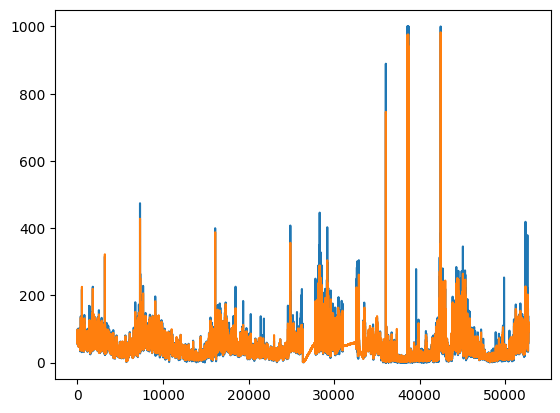

In [55]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [56]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.931112626629315


In [57]:
import joblib
joblib.dump(model, 'Gujarat_PM2.5_µgm³.pkl')

['Gujarat_PM2.5_µgm³.pkl']

In [58]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
pred_check2 = model.predict(X)

In [60]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9771603561769563


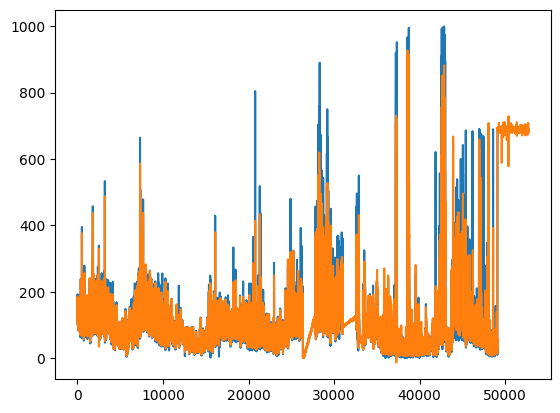

In [61]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [62]:
joblib.dump(model, 'Gujarat_PM10_µgm³.pkl')

['Gujarat_PM10_µgm³.pkl']